### REFERÊNCIA CÓDIGO BASE

https://www.youtube.com/watch?v=WOUMZatSiLM

<hr>

### IMPORTAÇÕES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sympy as symbols
from pandas.api.types import is_numeric_dtype

> <hr>

### DATASET

> Permanece o mesmo por enquanto;

In [2]:
# substituindo 'caminho/do/seu/iris.data' pelo caminho real do seu arquivo Iris.data e 'iris.csv' pelo nome desejado para o arquivo CSV de saída.
input_file = 'C:\\JupyterLab\\PAPL-UFPE\\ML-Fuzzy\\Testes\\iris.data'
output_file = 'iris.csv'

# carregando arquivo no pandas
iris_data = pd.read_csv(input_file, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# salvando em comma separated values (csv)
iris_data.to_csv(output_file, index=False)

In [3]:
# normalização
for index in iris_data.columns: # em suma, para as colunas do DataFrame, vamos analisar se os dados são numéricos
    # se os dados forem numéricos, eles serão normalizados
    if is_numeric_dtype(iris_data[index][0]): # retomando uma função do pandas
        iris_data[index] = iris_data[index]/max(iris_data[index])

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,0.645570,0.795455,0.202899,0.08,Iris-setosa
1,0.620253,0.681818,0.202899,0.08,Iris-setosa
2,0.594937,0.727273,0.188406,0.08,Iris-setosa
3,0.582278,0.704545,0.217391,0.08,Iris-setosa
4,0.632911,0.818182,0.202899,0.08,Iris-setosa


**ANALISANDO A DISTRIBUIÇÃO DOS DADOS**

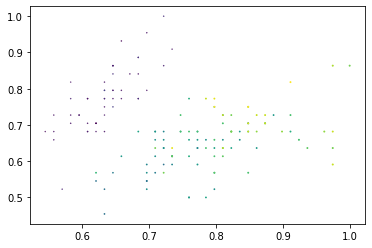

In [5]:
# todos os dados
data=iris_data.loc[:,['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
plt.scatter(data.sepal_length, data.sepal_width, data.petal_length, data.petal_width)

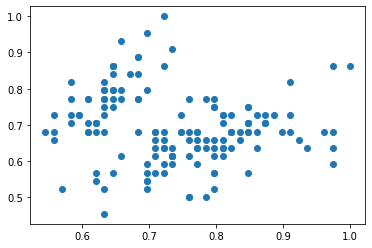

In [6]:
# data only according to sepal
data=iris_data.loc[:,['sepal_length', 'sepal_width']]
plt.scatter(data.sepal_length, data.sepal_width)

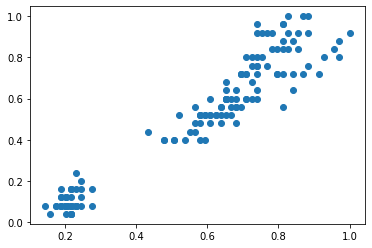

In [7]:
# data accoording only to petal
data=iris_data.loc[:,['petal_length', 'petal_width']]
plt.scatter(data.petal_length, data.petal_width)

> <hr>

### Observações Implementação

In [8]:
# aqui vai entrar só o kernel por enquanto
# deixar largura como constante NESSE doc

### FUZZY C-MEANS

In [9]:
iris_data = np.array(iris_data)
iris_data # shoukd be a 2d array

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08,
        'Iris-setosa'],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08, 'Iris-setosa'],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16, 'Iris-setosa'],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12, 'Iris-setosa'],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08, 'Iris-setosa'],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08, 'Iris-setosa'],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04,
        'Iris-setosa'],
       [0.68

In [10]:
iris_data_without_last_column = iris_data[:, :-1]
iris_data_without_last_column

array([[0.6455696202531644, 0.7954545454545454, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.6818181818181818, 0.20289855072463767, 0.08],
       [0.5949367088607594, 0.7272727272727273, 0.18840579710144928,
        0.08],
       [0.5822784810126581, 0.7045454545454545, 0.21739130434782608,
        0.08],
       [0.6329113924050632, 0.8181818181818181, 0.20289855072463767,
        0.08],
       [0.6835443037974683, 0.8863636363636362, 0.24637681159420288,
        0.16],
       [0.5822784810126581, 0.7727272727272726, 0.20289855072463767,
        0.12],
       [0.6329113924050632, 0.7727272727272726, 0.21739130434782608,
        0.08],
       [0.5569620253164557, 0.6590909090909091, 0.20289855072463767,
        0.08],
       [0.620253164556962, 0.7045454545454545, 0.21739130434782608, 0.04],
       [0.6835443037974683, 0.8409090909090908, 0.21739130434782608,
        0.08],
       [0.6075949367088607, 0.7727272727272726, 0.2318840579710145, 0.08],
       [0.607594936

**CONDIÇÕES INICIAIS**

> Acho que aqui vai caber definir algumas coisas como funções e não mais como valores fixos

In [18]:
# number of clusters
    # definido como 3 pq conheço o iris dataset
K = 3

# fuzziness value 
m = [1.1, 1.6, 2]
# os valores definidos acima foram indicados pelo professor

# largura
sigma = 1

In [19]:
# vamo juntar tudo aqui de maneira que una o feito às coisas novas

In [25]:
# definir um início randomico p U
U = np.random.rand(iris_data_without_last_column.shape[0], K)
print('Membership inicial (U inicial):')
print(U)
print()

Membership inicial (U inicial):
[[0.82189856 0.89367542 0.95835091]
 [0.03213742 0.50310178 0.02020117]
 [0.2665739  0.77272479 0.24863942]
 [0.76452059 0.86967244 0.13538741]
 [0.49541957 0.76718837 0.34559079]
 [0.54410527 0.99561898 0.98765174]
 [0.46829476 0.40065319 0.45890921]
 [0.89226287 0.51497861 0.95109144]
 [0.22074056 0.95401036 0.74821694]
 [0.56105797 0.7003032  0.17764461]
 [0.68700279 0.83457767 0.76918091]
 [0.68469059 0.52365402 0.69339664]
 [0.38540192 0.2505707  0.18663788]
 [0.04938126 0.53838686 0.07048215]
 [0.03150366 0.90533189 0.14039512]
 [0.77256276 0.4575741  0.25672025]
 [0.93252511 0.93533861 0.4258245 ]
 [0.69666691 0.40713376 0.19586682]
 [0.4122731  0.19147148 0.52392797]
 [0.65020952 0.91713072 0.85218957]
 [0.17069109 0.32877986 0.59707556]
 [0.21044064 0.14053736 0.13305687]
 [0.72123829 0.17736221 0.02900056]
 [0.26061029 0.11323049 0.82522441]
 [0.56856384 0.43434538 0.50684166]
 [0.55005134 0.07154679 0.18436143]
 [0.69295343 0.67726252 0.349868

In [26]:
# precisamos de 3 centroides pro caso do iris
def calculando_centroides(iris_data_without_last_column, K, U, m):
    centroides = np.zeros((K, iris_data_without_last_column.shape[1]))
    for i in range(K):
        U_corrigido = np.tile(U[:, i][:, np.newaxis], (1, iris_data_without_last_column.shape[1]))
        m_expandido = np.tile(m[i], (iris_data_without_last_column.shape[0], iris_data_without_last_column.shape[1]))
        centroides[i, :] = np.sum((U_corrigido ** m_expandido) * iris_data_without_last_column, axis=0) / np.sum(U_corrigido ** m_expandido)
    return centroides

centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

In [27]:
def gaussian_kernel(iris_data_without_last_column, centroides, sigma):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    distances = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distances[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return np.exp(-distances**2 / (2 * sigma**2))

def kg_membership(iris_data_without_last_column, centroides, sigma):
    """
    Calcula a matriz de membership fuzzy entre os dados e os centroides usando o kernel gaussiano.

    Args:
    iris_data_without_last_column (ndarray): Conjunto de dados.
    centroides (ndarray): Matriz de centroides dos clusters.
    sigma (float): parâmetro de largura!!!!! muito importante futuramente (sim preciso escrever isso em todo lugar para quando a ansiedade bater)
   
   Returns:
    ndarray: matriz de MEMBERSHIP fuzzy
        # lembrando que o pertencimento com kernel é calculado com base nas distâncias
        # então aqui meio que substitui a matriz_dg do FCM
    """
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]
    U_novo = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            x = iris_data_without_last_column[i:i+1]  # Seleciona um ponto de dados como um vetor unidimensional
            c = centroides[j:j+1]  # Seleciona um centróide como um vetor unidimensional
            U_novo[i, j] = gaussian_kernel(x, c, sigma)

    return U_novo # novos valores de pertinência agora foram calculados com KERNEL


U_novo =  kg_membership(iris_data_without_last_column, centroides, sigma)

def matriz_dg(iris_data_without_last_column, centroides):
    num_points = iris_data_without_last_column.shape[0]
    num_centroides = centroides.shape[0]

    distancias = np.zeros((num_points, num_centroides))

    for i in range(num_points):
        for j in range(num_centroides):
            distancias[i, j] = np.linalg.norm(iris_data_without_last_column[i] - centroides[j])

    return distancias

matriz_dg = matriz_dg(iris_data_without_last_column, centroides)

# mudando a função objetivo pra considerar o kernel
def fobj_kernel(U_novo, matriz_dg, m):
    """
    Calcula a função objetivo do KFCM

    Args:
    U_novo (ndarray): mmebership atualizado 
        # lembrando que a alteração do kernel foi importante pra calcular ele
    matriz_dg (ndarray): Matriz de distâncias ou similaridades.
    m (float): fuzziffier
                # def como constante

    Returns:
    float: valor da func objetivo
    """
    c, n = U_novo.shape # kernel tá entrando aqui no u_novo
    objetivo = 0

    for i in range(c):
        for j in range(n):
            objetivo += U_novo[i, j] ** m * matriz_dg[i, j] ** 2

    return objetivo

N = iris_data_without_last_column.shape[0] # número de dados
velho_obj = fobj_kernel(U_novo, matriz_dg, m)

In [28]:
maximo = 100

# Inicializar valores de pertinência e centroides
U = np.random.rand(iris_data_without_last_column.shape[0], K)
centroides = calculando_centroides(iris_data_without_last_column, K, U, m)

# Calcular matriz de distâncias inicial
J_anterior = matriz_dg

for iteration in range(maximo):
    # Atualizar valores de pertinência e centroides
    U_novo = kg_membership(iris_data_without_last_column, centroides, sigma)
    centroides = calculando_centroides(iris_data_without_last_column, K, U_novo, m)
    
    # Calcular nova matriz de distâncias
    nova_J = matriz_dg
    
    # Calcular função objetivo
    novo_objetivo = fobj_kernel(U_novo, nova_J, m)

    # Verificar convergência
    if (np.all(nova_J <= J_anterior) or 
        np.all(np.abs(novo_objetivo - velho_obj) < 1e-6) or
        iteration == maximo - 1):
        break

    # Atualizar valores para a próxima iteração
    velho_obj = novo_objetivo
    J_anterior = nova_J

    # Atualizar pertinências para a próxima iteração
    U = U_novo

In [24]:
print("Centroides finais:")
print(centroides)
print()
print("Membership Final (U_novo):")
print(U)

Centroides finais:
[[0.17890307 0.17371869 0.12180086 0.1023882 ]
 [0.17650876 0.17386073 0.11598617 0.09538549]
 [0.17474916 0.1739842  0.11168394 0.09023234]]

Membership Final (U_novo):
[[0.88374286 0.68278019 0.13295992]
 [0.12390298 0.25037246 0.60940255]
 [0.69275372 0.78906303 0.40829305]
 [0.51625503 0.99329307 0.18406376]
 [0.97488609 0.05656905 0.24468501]
 [0.70904075 0.84483953 0.11599874]
 [0.95130311 0.75197708 0.55802014]
 [0.0786794  0.49090127 0.80733537]
 [0.71856086 0.39313532 0.93746551]
 [0.825274   0.79135814 0.12604293]
 [0.98757776 0.37209788 0.75055547]
 [0.9546831  0.64342758 0.27496352]
 [0.99305729 0.31255725 0.3496538 ]
 [0.77233347 0.4540867  0.39485167]
 [0.19657421 0.06417512 0.67732987]
 [0.63781945 0.74328395 0.71322318]
 [0.59432161 0.05106184 0.36584533]
 [0.46770923 0.63300842 0.97306929]
 [0.82355892 0.93032128 0.49018014]
 [0.32077794 0.41773922 0.14070284]
 [0.04793548 0.57748597 0.5151299 ]
 [0.56857558 0.8731048  0.81906593]
 [0.5113819  0.1135